## Language Detection

Download the Dataset from https://www.kaggle.com/datasets/basilb2s/language-detection, then extract it and upload the csv file to this Notebook.

Credits: This Notebook is slightly adapted from https://github.com/basil-b2s/Language-Detector


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Loading the dataset
data = pd.read_csv("./Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
X = data["Text"]
y = data["Language"]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [6]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'\[\]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train = cv.transform(X_train).toarray()
x_test  = cv.transform(X_test).toarray()

In [9]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [12]:
print("Accuracy is :",ac)

Accuracy is : 0.971953578336557


In [ ]:
print(cr)

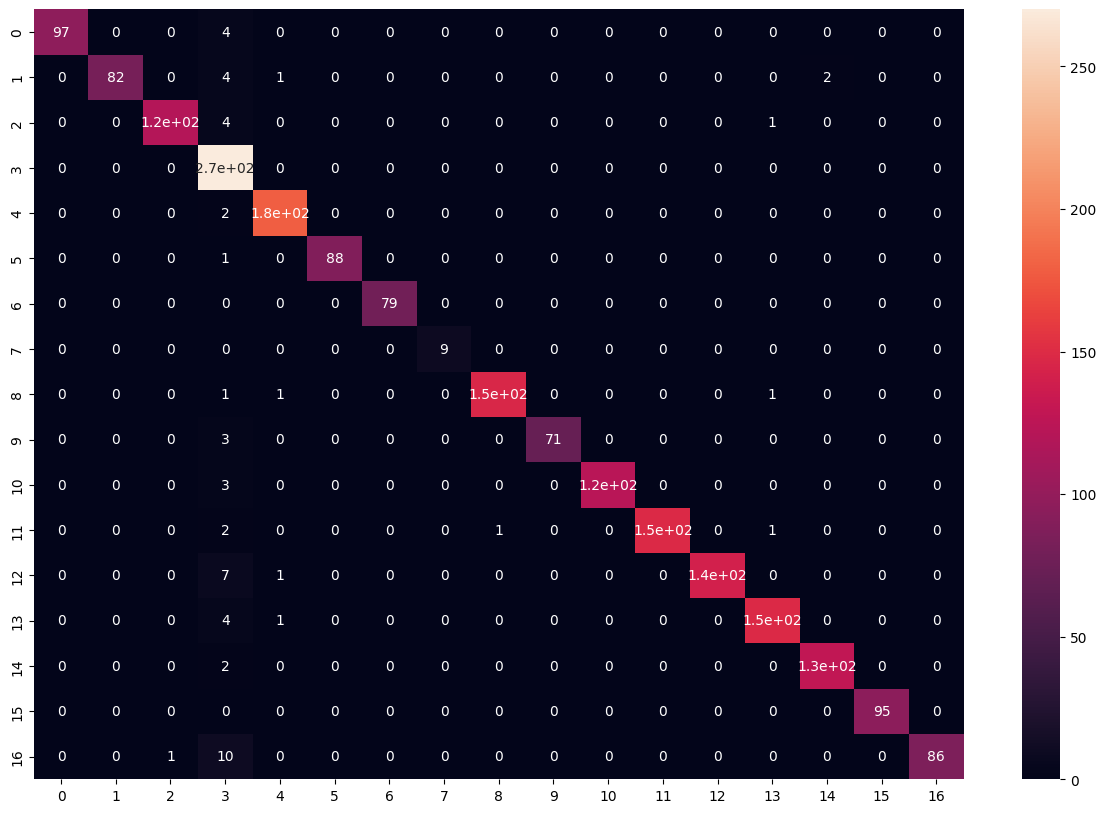

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.show()

In [14]:
#Predicting with some more data
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [17]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian
The langauge is in Hindi
